In [ ]:
from scipy.stats import friedmanchisquare

# F1-scores for each model (organize by dataset or experiment where applicable)
f1_scores = [
    [0.34, 0.26, 0.23],  # No Embeddings (CNN, LSTM, GRU)
    [0.57, 0.60, 0.62],  # Glove
    [0.56, 0.59, 0.51],  # FastText
    [0.57, 0.61, 0.62],  # Word2Vec
    [0.75, 0.75, 0.92]   # Contextual ( RoBERTa, XLM-R, AfriBERTa)
]

# Perform the Friedman Test
stat, p_value = friedmanchisquare(*f1_scores)

# Print results
print("Friedman statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Statistically significant differences found (p < 0.05).")
else:
    print("No statistically significant differences (p >= 0.05).")


Friedman statistic: 11.862068965517244
p-value: 0.018406978781260738
Statistically significant differences found (p < 0.05).


In [ ]:
"""
from scipy.stats import friedmanchisquare

# Truncate the last list to match the length of others
f1_scores = [
    [0.34, 0.26, 0.23],  # No Embeddings (CNN, LSTM, GRU)
    [0.57, 0.60, 0.62],  # Glove
    [0.56, 0.59, 0.51],  # FastText
    [0.57, 0.61, 0.62],  # Word2Vec
    [0.73, 0.75, 0.75, 0.92],  # Contextual (truncated to match others)
]

# Perform the Friedman Test
stat, p_value = friedmanchisquare(*f1_scores)

# Print results
print("Friedman statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Statistically significant differences found (p < 0.05).")
else:
    print("No statistically significant differences (p >= 0.05).")
"""

'\nfrom scipy.stats import friedmanchisquare\n\n# Truncate the last list to match the length of others\nf1_scores = [\n    [0.34, 0.26, 0.23],  # No Embeddings (CNN, LSTM, GRU)\n    [0.57, 0.60, 0.62],  # Glove\n    [0.56, 0.59, 0.51],  # FastText\n    [0.57, 0.61, 0.62],  # Word2Vec\n    [0.73, 0.75, 0.75, 0.92],  # Contextual (truncated to match others)\n]\n\n# Perform the Friedman Test\nstat, p_value = friedmanchisquare(*f1_scores)\n\n# Print results\nprint("Friedman statistic:", stat)\nprint("p-value:", p_value)\n\n# Interpretation\nif p_value < 0.05:\n    print("Statistically significant differences found (p < 0.05).")\nelse:\n    print("No statistically significant differences (p >= 0.05).")\n'

In [ ]:
pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp
import numpy as np

# Flattened F1-scores for each model (in order of groups above)
f1_scores_flat = [[0.34, 0.26, 0.23, 0.57, 0.60, 0.62, 0.56, 0.59, 0.51, 0.57, 0.61, 0.62, 0.75, 0.75, 0.92]]
model_labels = ["CNN (No Emb)", "LSTM (No Emb)", "GRU (No Emb)",
                "CNN (Glove)", "LSTM (Glove)", "GRU (Glove)",
                "CNN (FastText)", "LSTM (FastText)", "GRU (FastText)",
                "CNN (Word2Vec)", "LSTM (Word2Vec)", "GRU (Word2Vec)",
                "RoBERTa", "XLM-R", "AfriBERTa"]

# Perform the Nemenyi Test
nemenyi_results = sp.posthoc_nemenyi_friedman(f1_scores_flat, model_labels)

# Print results
print(nemenyi_results)


           0         1         2         3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000  0.999807  0.991555  1.000000   
1   1.000000  1.000000  1.000000  0.999994  0.998882  0.976198  1.000000   
2   1.000000  1.000000  1.000000  0.999932  0.995387  0.944830  0.999999   
3   1.000000  0.999994  0.999932  1.000000  1.000000  0.999979  1.000000   
4   0.999807  0.998882  0.995387  1.000000  1.000000  1.000000  0.999999   
5   0.991555  0.976198  0.944830  0.999979  1.000000  1.000000  0.999513   
6   1.000000  1.000000  0.999999  1.000000  0.999999  0.999513  1.000000   
7   0.999979  0.999807  0.998882  1.000000  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  1.000000  0.999979  0.997642  1.000000   
9   1.000000  0.999994  0.999932  1.000000  1.000000  0.999979  1.000000   
10  0.998882  0.995387  0.985436  1.000000  1.000000  1.000000  0.999979   
11  0.991555  0.976198  0.944830  0.999979  1.000000  1.000000  0.999513   
12  0.944830

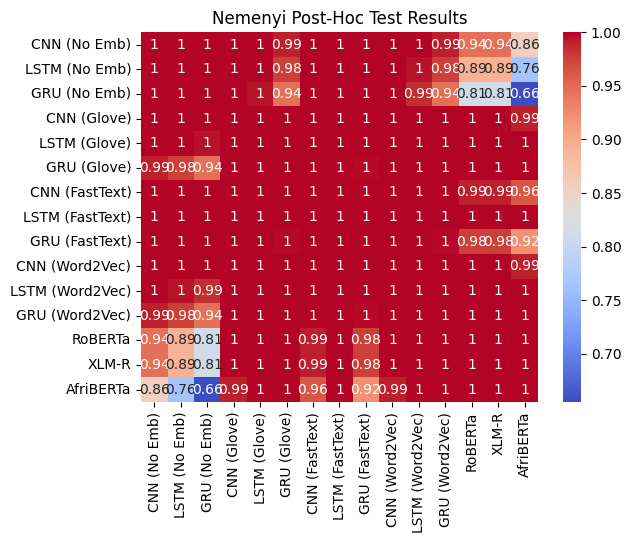

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of Nemenyi results
sns.heatmap(nemenyi_results, annot=True, cmap="coolwarm", xticklabels=model_labels, yticklabels=model_labels)
plt.title("Nemenyi Post-Hoc Test Results")
plt.show()
